# Data wrangling

## Gather

### Data Sorces :
- twitter-archive-enhanced.csv file
- twitter API
- download image-predictions.tsv

In [1]:
# import needed packages
import pandas as pd
import numpy as np
import requests
import tweepy
import json

from timeit import default_timer as timer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load df from file twitter-archive-enhaced.csv

archive = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
# download and load image-predictions.tsv file

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)
    

In [3]:
# load df from file image-predictions.tsv

image = pd.read_csv("image-predictions.tsv", sep="\t")

In [5]:
# consume twitter API and get data from it 

# API autentication 
consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

tweet_ids = archive.tweet_id.values

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        #print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
            #print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            #print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
#print(fails_dict)


Rate limit reached. Sleeping for: 742
Rate limit reached. Sleeping for: 740
1912.7278686980003


In [4]:
df_list = []

with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        #print(line)
        #break
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count,
                       'user_count': user_count})
        
api = pd.DataFrame(df_list)
api.sample(5)


,favorite_count,retweet_count,tweet_id,user_count
1600,2037,788,684880619965411328,8869466
2308,180,81,666337882303524864,8869442
1588,2587,616,685321586178670592,8869466
479,9253,1914,813172488309972993,8869454
887,4504,1090,757611664640446465,8869465


## Assessment
### Twitter archive enhanced data

In [7]:
archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
40,884562892145688576,NaN,NaN,2017-07-11 00:00:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kevin. He's just so happy. 13/10 what ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884562892...,13,10,Kevin,None,None,None,None
263,842535590457499648,NaN,NaN,2017-03-17 00:38:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winnie. She lost her body saving a chi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/842535590...,13,10,Winnie,None,None,None,None
326,833826103416520705,NaN,NaN,2017-02-20 23:50:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Charlie. She asked u to change the channe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/833826103...,13,10,Charlie,None,None,None,None
164,860184849394610176,NaN,NaN,2017-05-04 17:30:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have perhaps the wisest dog of all. Ab...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/860184849...,14,10,None,None,None,None,None
2285,667188689915760640,NaN,NaN,2015-11-19 03:52:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Quite an advanced dog here. Impressively dress...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667188689...,10,10,None,None,None,None,None


In [8]:
archive.shape

(2356, 17)

In [9]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
pd.set_option('display.max_colwidth', 200)
archive[archive.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26


## Image prediction data

In [10]:
image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
872,697990423684476929,https://pbs.twimg.com/media/Ca_ClYOW0AAsvpE.jpg,2,Pembroke,0.984783,True,Cardigan,0.015018,True,Shetland_sheepdog,0.000074,True
166,668981893510119424,https://pbs.twimg.com/media/CUize-0WEAAerAK.jpg,1,jellyfish,0.447246,False,coral_reef,0.238625,False,goldfish,0.040227,False
468,675109292475830276,https://pbs.twimg.com/media/CV54UQTXAAAGf-j.jpg,1,dalmatian,0.989519,True,English_setter,0.005258,True,German_short-haired_pointer,0.001443,True
1331,757611664640446465,https://pbs.twimg.com/media/CoOTyXJXEAAtjs9.jpg,1,bluetick,0.829259,True,beagle,0.145358,True,Walker_hound,0.019595,True
1070,716285507865542656,https://pbs.twimg.com/media/CfDB3aJXEAAEZNv.jpg,1,Yorkshire_terrier,0.430420,True,silky_terrier,0.196769,True,cairn,0.072676,True


In [11]:
image.shape

(2075, 12)

In [12]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
image["img_num"].min()

1

In [14]:
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
# importing image python

from IPython.display import Image

Image(url= "https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg" )

### Twitter API data

In [16]:
api.sample(5)

,favorite_count,retweet_count,tweet_id,user_count
375,4832,910,826204788643753985,8869454
2119,474,148,669942763794931712,8869442
1485,3958,1110,691459709405118465,8869466
714,20670,5530,781524693396357120,8869454
518,0,7335,807059379405148160,8869454


In [17]:
api.shape

(2331, 4)

In [18]:
api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
tweet_id          2331 non-null int64
user_count        2331 non-null int64
dtypes: int64(4)
memory usage: 72.9 KB


*****************

In [19]:
all_columns = pd.Series(list(archive) + list(image) + list(api))
all_columns[all_columns.duplicated()]

17    tweet_id
31    tweet_id
dtype: object

### Quality

<ol>
 <li> Archive table: There are 181 retweets not dog ratings. </li>
 <li> Archive table: There are 78 replay not dog ratings. </li>
 <li> Archive table: Some columns need to be dropped. </li>
 <li> Archive table: Incorrect value in doggo,floofer,pupper,puppo set to Empty instead of None. </li>
 <li> Archive table: Erroneous data type for timestamp . It is String but it should be datetime. </li>
 <li> Archive table: Name variable contains the value none to represent missing values. </li>
 <li> Image table: The text in p1, p2 and p3 to be all in lower case. </li>
 <li> Image table: Some image urls are duplicated. </li>
 
 <li> Archive table: Incorrect some values in rating_numerator . </li>
    
</ol>


### Tidiness
<ol>
 <li> Dog "stage" variable in four columns: doggo, floofer, pupper, puppo. </li>
 <li> Join 'api' dataframe and 'image' datframe to 'archive' dataframe. </li>
</ol>

 ## Clean

In [7]:
archive_clean = archive.copy()
image_clean = image.copy()
api_clean = api.copy()

### Quality

##### Define
 1. Archive table: There are 181 retweets not dog ratings.

##### Code

In [8]:
# remove retweet ( have retweeted_status_id) 
retweets_df = archive_clean.dropna(subset=['retweeted_status_id'])
archive_clean = archive_clean.drop(retweets_df.index)

##### Test

In [9]:
archive_clean['retweeted_status_id'].notna().sum()

0

--------------------
##### Define
 2. There are 78 replay not dog ratings.

##### Code

In [10]:
# remove retweet ( have retweeted_status_id) 
retweets_df = archive_clean.dropna(subset=['retweeted_status_id'])
archive_clean = archive_clean.drop(retweets_df.index)

# remove reply ( have in_reply_to_status_id) 
retweets_df = archive_clean.dropna(subset=['in_reply_to_status_id'])
archive_clean = archive_clean.drop(retweets_df.index)

##### Test

In [11]:
archive_clean['in_reply_to_status_id'].notna().sum()

0

--------------
##### Define
 3. Some columns need to be dropped.

##### Code

In [12]:
archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],axis=1,inplace=True)

##### Test

In [13]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


--------------
##### Define
 4. Incorrect value in doggo,floofer,pupper,puppo set to Empty instead of None.

##### Code

In [14]:
archive_clean.doggo = archive_clean.doggo.replace('None', value='')
archive_clean.floofer = archive_clean.floofer.replace('None', value='')
archive_clean.pupper = archive_clean.pupper.replace('None', value='')
archive_clean.puppo = archive_clean.puppo.replace('None', value='')

##### Test

In [15]:
archive_clean.doggo.value_counts()

         2014
doggo      83
Name: doggo, dtype: int64

In [16]:
archive_clean.floofer.value_counts()

           2087
floofer      10
Name: floofer, dtype: int64

In [17]:
archive_clean.pupper.value_counts()

          1867
pupper     230
Name: pupper, dtype: int64

In [18]:
archive_clean.puppo.value_counts()

         2073
puppo      24
Name: puppo, dtype: int64

----------------
##### Define
 5. Erroneous data type for timestamp . It is String but it should be datetime.

##### Code

In [19]:
archive_clean["timestamp"] = pd.to_datetime(archive_clean["timestamp"])

##### Test

In [20]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


--------------------------
##### Define
 6. Name variable contains the value none to represent missing values.

##### Code

In [21]:
archive_clean.name = archive_clean.name.replace('None', value=np.nan)

##### Test

In [22]:
'None' in archive_clean.name.any()

False

---------------------------
##### Define
 7. The text in p1, p2 and p3 to be all in lower case.

##### Code

In [23]:
image_clean.p1 = image_clean.p1.str.lower()
image_clean.p2 = image_clean.p2.str.lower()
image_clean.p3 = image_clean.p3.str.lower()

##### Test

In [24]:
image_clean.p1.str.islower().all()

True

In [25]:
image_clean.p2.str.islower().all()

True

In [26]:
image_clean.p3.str.islower().all()

True

---------------------------------------
##### Define
 8. Some image urls are duplicated.

##### Code

In [27]:
sum(image_clean.jpg_url.duplicated())

66

In [28]:
image_clean = image_clean.drop_duplicates('jpg_url')

##### Test

In [29]:
sum(image_clean.jpg_url.duplicated())

0

---------------------------------------
##### Define
 9. Incorrect some values in rating_numerator.

##### Code

In [30]:
archive_clean[archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26


In [31]:
archive_clean['rating_numerator'] = archive_clean.text.str.extract('(\d+\.\d*)', expand = False).astype('float')

##### Test

In [32]:
archive_clean[archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26


--------------------
### Tidiness

##### Define
 1. Dog "stage" variable in four columns: doggo, floofer, pupper, puppo.

##### Code

In [33]:
(archive_clean.loc[:, 'doggo':"puppo"] != 'None') .sum()

doggo      2097
floofer    2097
pupper     2097
puppo      2097
dtype: int64

In [34]:
#Concatenate values from all 4 columns doggo, fluffer, pupper and puppo into one column. 
archive_clean['stage'] = archive_clean[['doggo', 'floofer', 'pupper','puppo']].T.iloc[0:].sum()
archive_clean.drop(['doggo', 'floofer', 'pupper','puppo'],axis=1, inplace=True)

##### Test

In [35]:
archive_clean['stage'].value_counts()

                1761
pupper           221
doggo             72
puppo             23
doggopupper        9
floofer            9
doggofloofer       1
doggopuppo         1
Name: stage, dtype: int64

In [36]:
archive_clean.loc[archive_clean.stage=='doggopupper', 'stage'] = 'doggo, pupper'
archive_clean.loc[archive_clean.stage=='doggopuppo', 'stage'] = 'doggo, puppo'
archive_clean.loc[archive_clean.stage=='doggofloofer', 'stage'] = 'doggo, floofer'
archive_clean['stage'].value_counts()

                  1761
pupper             221
doggo               72
puppo               23
floofer              9
doggo, pupper        9
doggo, floofer       1
doggo, puppo         1
Name: stage, dtype: int64

---------------------------------------
##### Define
 2. Join 'api' dataframe and 'image' datframe to 'archive' dataframe.

##### Code

In [37]:
master_df = pd.merge(archive_clean, image_clean, how='inner', on='tweet_id')
master_df = pd.merge(master_df, api_clean, how='inner', on='tweet_id')

##### Test

In [38]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 23 columns):
tweet_id              1964 non-null int64
timestamp             1964 non-null datetime64[ns]
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      29 non-null float64
rating_denominator    1964 non-null int64
name                  1440 non-null object
stage                 1964 non-null object
jpg_url               1964 non-null object
img_num               1964 non-null int64
p1                    1964 non-null object
p1_conf               1964 non-null float64
p1_dog                1964 non-null bool
p2                    1964 non-null object
p2_conf               1964 non-null float64
p2_dog                1964 non-null bool
p3                    1964 non-null object
p3_conf               1964 non-null float64
p3_dog                1964 non-null bool
favorite_count        1964 non-n

------------------------


## Storing, Analyzing and Vizualizing Data

In [39]:
master_df.to_csv('master_cleaned_data.csv', index=False)

In [40]:
master_cleaned_df = pd.read_csv("master_cleaned_data.csv")

#### count of every stage.

In [41]:
master_cleaned_df.stage.value_counts()

pupper            201
doggo              62
puppo              22
doggo, pupper       8
floofer             7
doggo, floofer      1
doggo, puppo        1
Name: stage, dtype: int64


#### Average number of retweets according to the Dog Stage.

In [42]:
print('Average number of retweets according to the Dog Stage: \n', master_cleaned_df.groupby('stage')['retweet_count'].mean())

Average number of retweets according to the Dog Stage: 
 stage
doggo              6375.806452
doggo, floofer     2987.000000
doggo, pupper      3944.125000
doggo, puppo      17017.000000
floofer            4245.285714
pupper             2058.174129
puppo              5683.500000
Name: retweet_count, dtype: float64


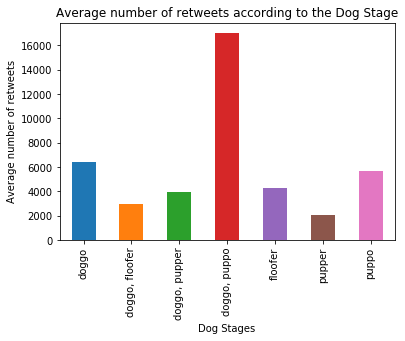

In [43]:
master_cleaned_df.groupby('stage')['retweet_count'].mean().plot(kind='bar')
plt.title('Average number of retweets according to the Dog Stage')
plt.xlabel('Dog Stages')
plt.ylabel('Average number of retweets')
plt.show();

#### Average number of favorites according to the Dog Stage.

In [44]:
print('Average number of favorites according to the Dog Stage: \n', master_cleaned_df.groupby('stage')['favorite_count'].mean())

Average number of favorites according to the Dog Stage: 
 stage
doggo             18527.564516
doggo, floofer    15571.000000
doggo, pupper     12992.500000
doggo, puppo      43729.000000
floofer           11815.714286
pupper             6588.422886
puppo             20564.272727
Name: favorite_count, dtype: float64


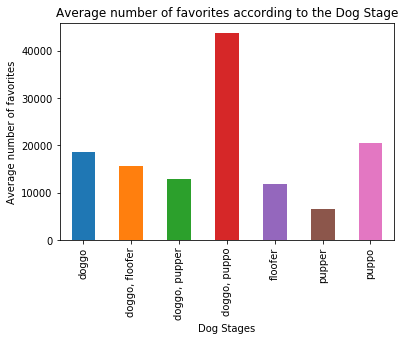

In [45]:
master_cleaned_df.groupby('stage')['favorite_count'].mean().plot(kind='bar')
plt.title('Average number of favorites according to the Dog Stage')
plt.xlabel('Dog Stages')
plt.ylabel('Average number of favorites')
plt.show();

#### Dog Rating Numerators

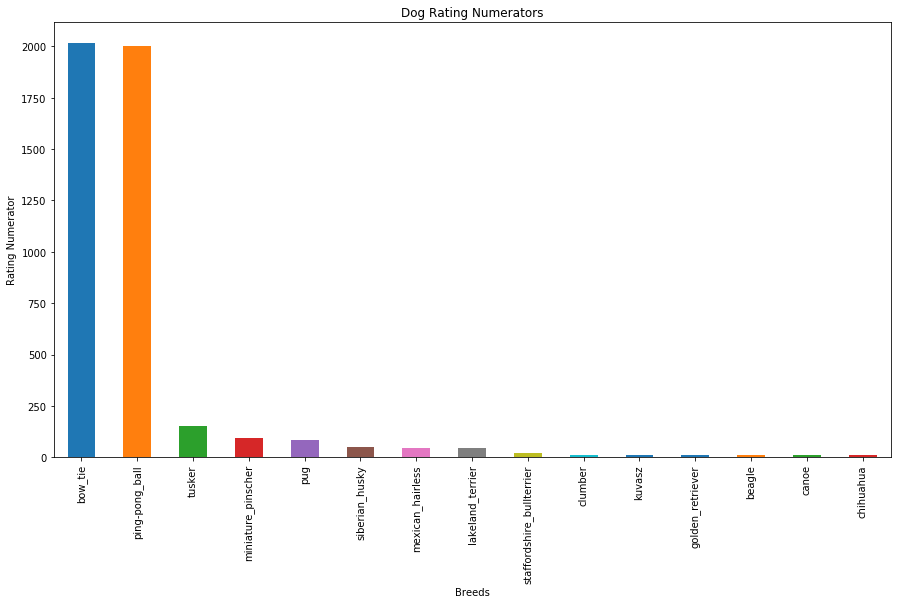

In [46]:

fig = plt.figure(figsize=(15,8))
ax = master_cleaned_df.groupby('p1')['rating_numerator'].mean().sort_values(ascending=False).nlargest(15).plot(kind='bar')
ax.set(title="Dog Rating Numerators", xlabel="Breeds", ylabel="Rating Numerator");

#### Retweets and favorites Scatter plot

Text(0.5,1,'Retweets and favorites Scatter plot')

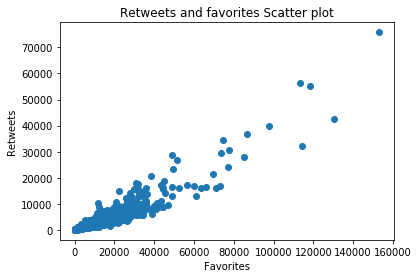

In [47]:
plt.scatter(master_cleaned_df['favorite_count'], master_cleaned_df['retweet_count'])
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')